#Import the Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/heart rate.csv")

In [ ]:
#steps in it:
#1.collect the data
#2.analyse the data
#3.data wrangling
#4.train/test
#5.accuracy

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45,1,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68,1,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57,1,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


#Display top5 Rows and Last5 Rows

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45,1,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68,1,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57,1,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0
302,57,0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        275 non-null    float64
 3   trtbps    260 non-null    float64
 4   chol      250 non-null    float64
 5   fbs       260 non-null    float64
 6   restecg   260 non-null    float64
 7   thalachh  293 non-null    float64
 8   exng      281 non-null    float64
 9   oldpeak   275 non-null    float64
 10  slp       253 non-null    float64
 11  caa       253 non-null    float64
 12  thall     265 non-null    float64
 13  output    303 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.00,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.00,1.0
cp,275.0,0.949091,1.034597,0.0,0.0,1.0,2.00,3.0
trtbps,260.0,133.042308,17.583396,100.0,120.0,130.0,140.00,200.0
chol,250.0,246.184000,49.364782,126.0,212.0,241.5,275.75,417.0
fbs,260.0,0.157692,0.365155,0.0,0.0,0.0,0.00,1.0
restecg,260.0,0.519231,0.530549,0.0,0.0,1.0,1.00,2.0
thalachh,293.0,149.412969,23.015557,71.0,133.0,152.0,166.00,202.0
exng,281.0,0.338078,0.473899,0.0,0.0,0.0,1.00,1.0
oldpeak,275.0,1.081455,1.188134,0.0,0.0,0.8,1.80,6.2


In [ ]:
df.isnull().sum()

age          0
sex          0
cp          28
trtbps      43
chol        53
fbs         43
restecg     43
thalachh    10
exng        22
oldpeak     28
slp         50
caa         50
thall       38
output       0
dtype: int64

In [ ]:
df['trtbps'].mean()

133.0423076923077

In [ ]:
df['trtbps'].fillna(133,inplace=True)

In [ ]:
df['exng'].value_counts()

0.0    186
1.0     95
Name: exng, dtype: int64

In [ ]:
df['exng'].fillna(0,inplace=True)

In [ ]:
df['thalachh'].mean()

149.41296928327645

In [ ]:
df['thalachh'].fillna(149,inplace=True)

In [ ]:
df['slp'].value_counts()

1.0    172
2.0    114
0.0     17
Name: slp, dtype: int64

In [ ]:
df['slp'].fillna(1,inplace=True)

In [ ]:
df['chol'].mean()

246.184

In [ ]:
df.fillna(246,inplace=True)

In [ ]:
df.isnull().sum()

age          0
sex          0
cp          28
trtbps       0
chol        53
fbs         43
restecg     43
thalachh    10
exng        22
oldpeak     28
slp         50
caa         50
thall       38
output       0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

#Descriptive Analysis

In [ ]:
df['chol'].describe()

count    250.000000
mean     246.184000
std       49.364782
min      126.000000
25%      212.000000
50%      241.500000
75%      275.750000
max      417.000000
Name: chol, dtype: float64

In [ ]:
# Generate frequency tables for each categorical column
sex_freq = df['sex'].value_counts()
cp_freq = df['cp'].value_counts()
fbs_freq = df['fbs'].value_counts()
restecg_freq = df['restecg'].value_counts()
exng_freq = df['exng'].value_counts()
slp_freq = df['slp'].value_counts()
caa_freq = df['caa'].value_counts()
thall_freq = df['thall'].value_counts()
output_freq = df['output'].value_counts()

In [ ]:
print(sex_freq)
print(cp_freq)
print(fbs_freq)
print(restecg_freq)
print(exng_freq)
print(slp_freq)
print(caa_freq)
print(thall_freq)
print(output_freq)

1    207
0     96
Name: sex, dtype: int64
0.0    134
2.0     80
1.0     41
3.0     20
Name: cp, dtype: int64
0.0    219
1.0     41
Name: fbs, dtype: int64
0.0    129
1.0    127
2.0      4
Name: restecg, dtype: int64
0.0    186
1.0     95
Name: exng, dtype: int64
1.0    122
2.0    114
0.0     17
Name: slp, dtype: int64
0.0    144
1.0     57
2.0     33
3.0     17
4.0      2
Name: caa, dtype: int64
2.0    139
3.0    106
1.0     18
0.0      2
Name: thall, dtype: int64
1    165
0    138
Name: output, dtype: int64


#Data Visualization

In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
#By using countplot how many have heart disease.

<Axes: xlabel='output', ylabel='count'>

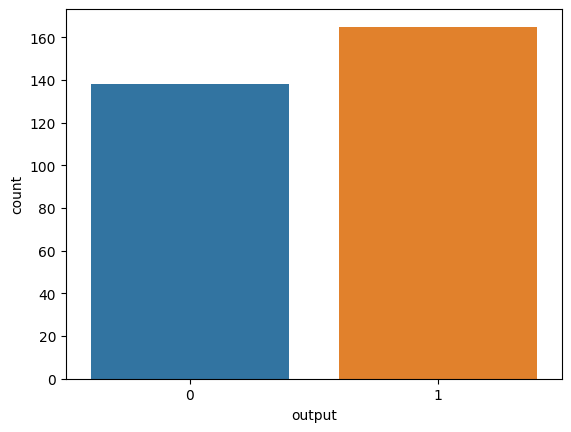

In [ ]:
sns.countplot(x='output',data=df)

from this data 160 members of the people having heart disease.and 140 are not having.

In [ ]:
#find the count of male and female in this dataset

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

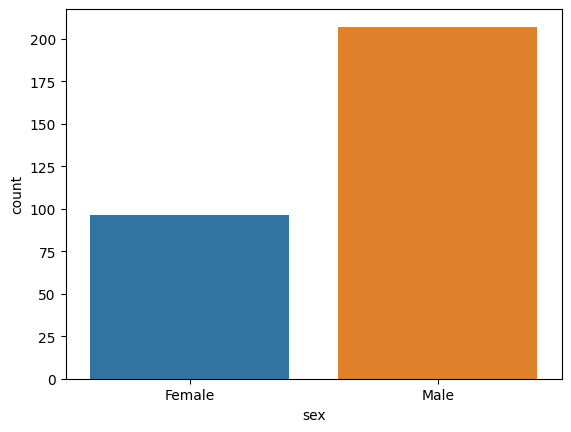

In [ ]:
sns.countplot(x='sex',data=df)
plt.xticks([0,1],['Female','Male'])
plt.show()

from this dataset around 30% of people are female and 80% are male.

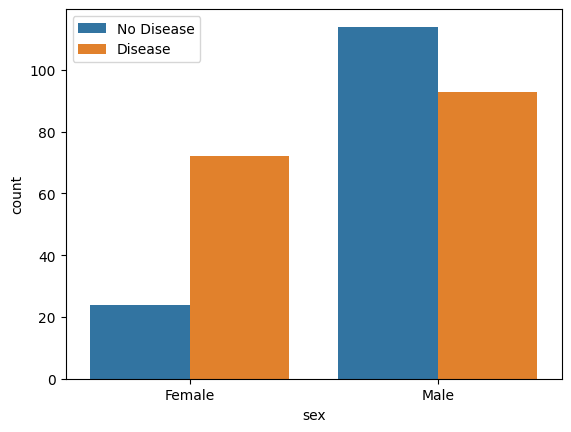

In [ ]:
sns.countplot(x='sex',hue='output',data=df)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

By observing that in female 70% are having heart disease,30% are not having heart disease.
coming to male 90% are not having heart disease.
compared to both male is the highest   


<Axes: >

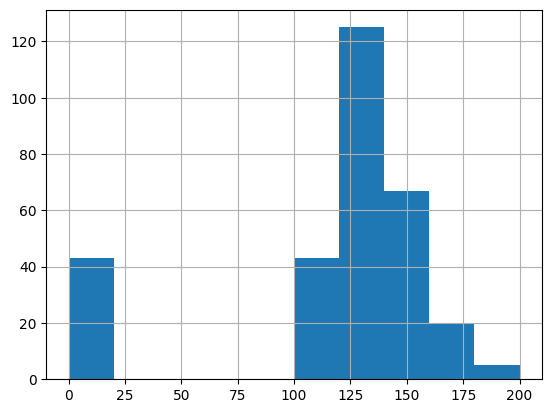

In [ ]:
df['trtbps'].hist()

from the above dataset the blood pressure of the people is in between 120-140 is highest.

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
#To check who are having high bloodpressure and fasting blood sugar levels.

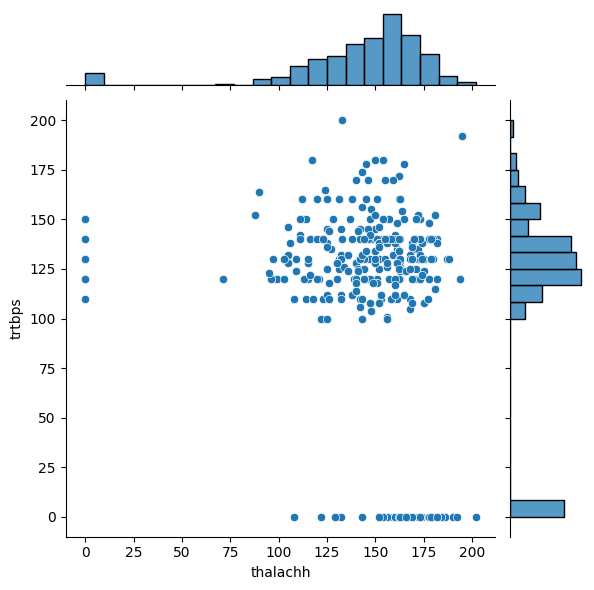

In [ ]:
sns.jointplot(x='thalachh',y='trtbps',data=df)


from this dataset during exercise the blood pressure is in between the range 150-175.

In [ ]:
df['cp'].value_counts()

0.0    162
2.0     80
1.0     41
3.0     20
Name: cp, dtype: int64

In [ ]:
#we taken as 0,1,2,3 labels named as 'Microvascular Angina','Stable Angina','Unstable Angina','Angina Inversa'

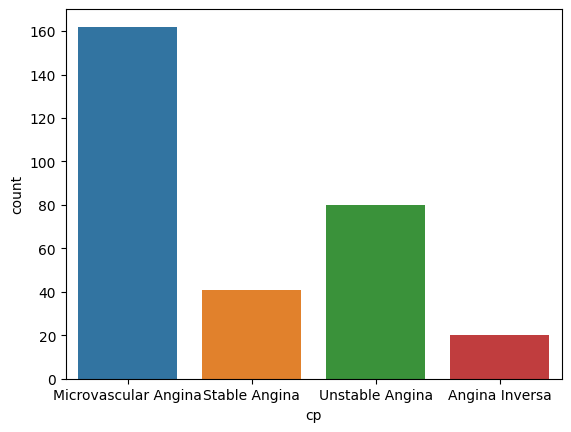

In [ ]:
sns.countplot(x='cp',data=df)
plt.xticks([0,1,2,3],['Microvascular Angina','Stable Angina','Unstable Angina','Angina Inversa'])
plt.show()

There are 4 types of chest pain are present in the dataset
The people are facing mostly microvascular chest pain compared to other.

In [ ]:
#Relationship between different numerical features

Text(0.5, 1.0, 'Age vs RBP')

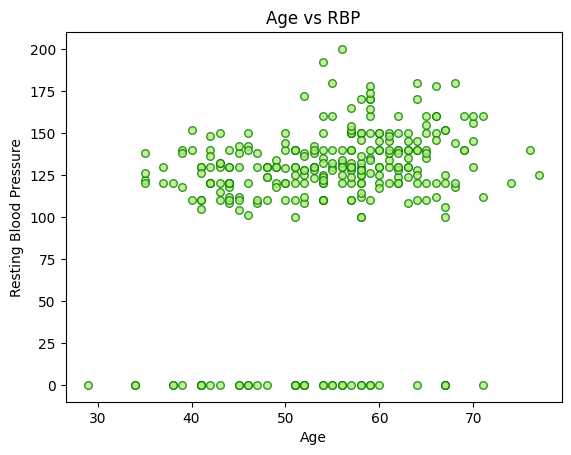

In [ ]:
plt.scatter(df['age'],df['trtbps'],s=30, c ='#b6eb7a', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs RBP')

The scatter plot suggests that there is no correlation between age and resting blood pressure

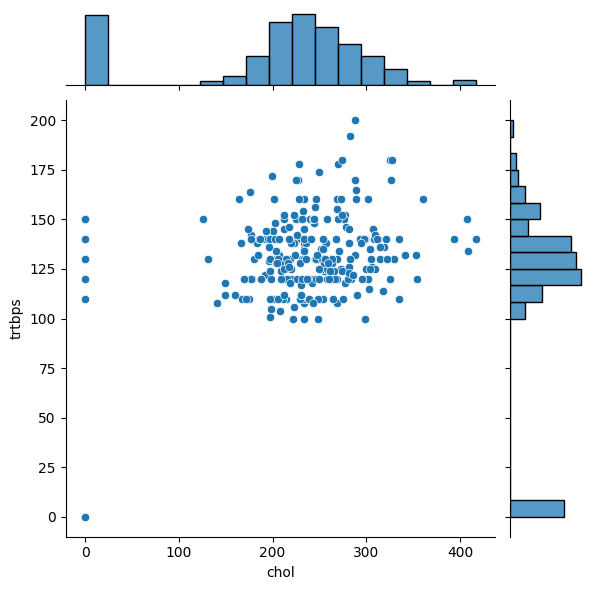

In [ ]:
  sns.jointplot(x=df['chol'], y=df['trtbps'],data=df)

Resting blood pressure are in between range 100-175.
serum cholesterol level are in between range of 200-300.

Number of Female Patients: 96
Number of Male Patients: 207


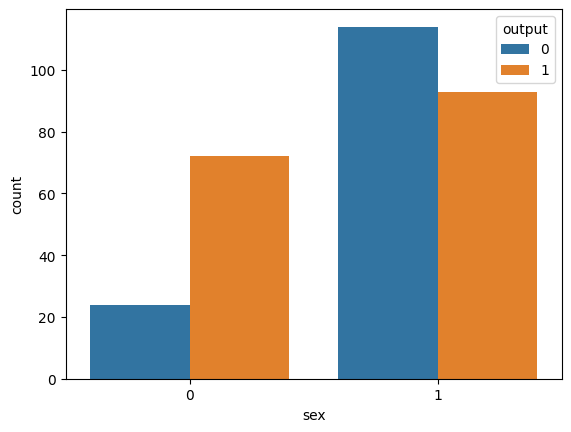

In [ ]:
sns.countplot(x="sex", data=df,hue='output')
male, fm = df['sex'].value_counts()
print('Number of Female Patients:', fm)
print('Number of Male Patients:', male)

from this dataset
Number of Female Patients: 96
Number of Male Patients: 207

<Axes: xlabel='thalachh'>

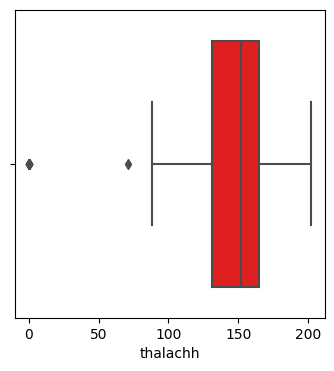

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='thalachh', hue='output', data = df,color = 'r')

we conclude in during exercise the heart rate achieved maximum that the distribution is in between 125-160 and also few outliers are shown.

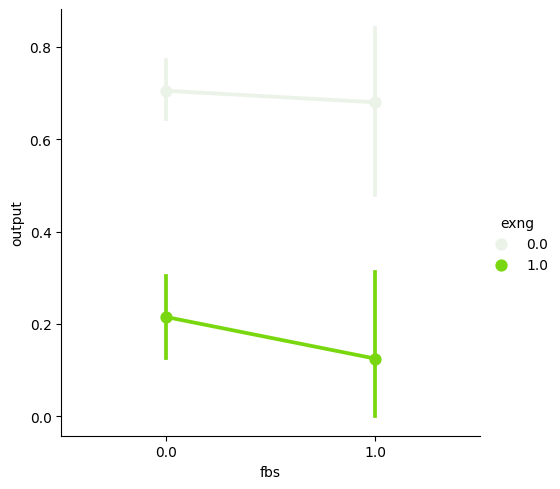

In [ ]:
sns.catplot(x='fbs',y='output',data=df,kind='point',hue='exng',color = '#79d70f')

Majority of people with heart disease had FBS > 120 and no Exercised Induced Angina.

In [ ]:
#Analysise the Correlation between feactures.

<Axes: >

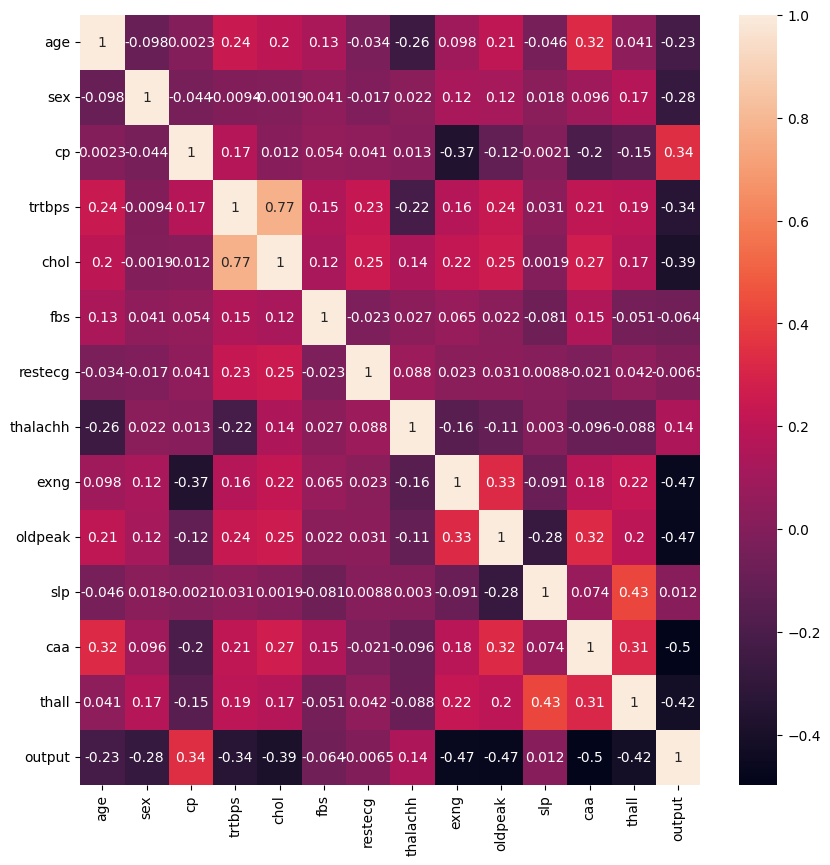

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='thalachh'>

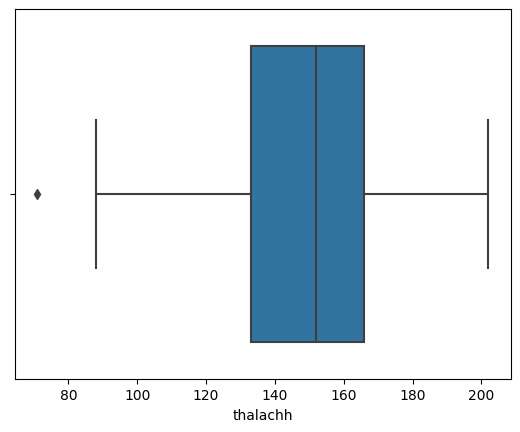

In [ ]:
sns.boxplot(x='thalachh',data=df)

There is one outlier and having distribution between the range 120-165.

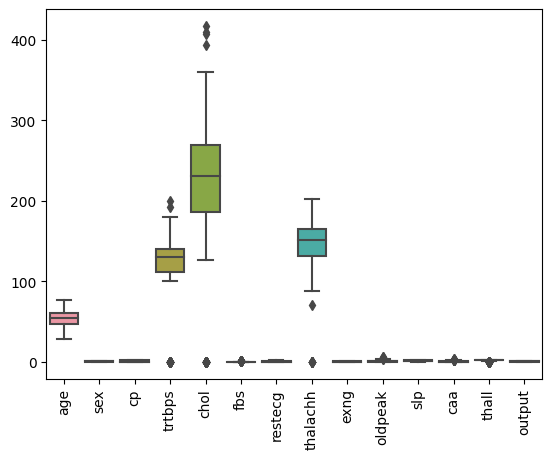

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

from this dataset chol is the highest distribution between the range 200-300,compared to others.and are also having outliers.

#Predictive Modeling

#Feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.10,random_state=100)

#StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Model Training

In [ ]:
## Model Training  Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#LogisticRegression

In [ ]:
y=df['output']
x=df.drop(columns=['output'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=200)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predictions=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix)

<function confusion_matrix at 0x7aa6b4bc9900>


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,predictions)

0.8351648351648352

In [ ]:
#Decision tree

In [ ]:
y=df['output']
x=df.drop(columns=['output'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.5,random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

0.8223684210526315

#K-Nearest Neighbors

In [ ]:
# Fitting the models in K-Nearest Neighbors (KNN)

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1])

<Axes: >

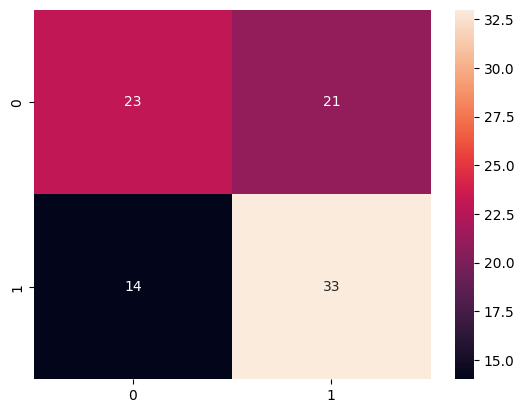

In [ ]:
from sklearn.metrics import confusion_matrix
model=confusion_matrix(y_test,y_pred)
sns.heatmap(model,annot=True)

Here we are seeing having 21 false negative ,means we are predicting that 21 members are not having heart disease but it predicts they are having heart disease.

In [ ]:
accuracy_score(y_test,predictions)

0.8021978021978022

In [ ]:
# Create a Random Forest Classifier
model_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
model_classifier.fit(x_train,y_train)
predictions= model_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy:{accuracy}")

Accuracy:0.8552631578947368


#Feature Selection

In [ ]:
feature_score=pd.Series(model_classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_score

thall       0.158244
oldpeak     0.145476
caa         0.144988
chol        0.100575
cp          0.087886
thalachh    0.086091
trtbps      0.074768
age         0.073886
exng        0.042841
slp         0.041160
sex         0.023465
restecg     0.014133
fbs         0.006487
dtype: float64

fbs feacture has less importance compared to others.

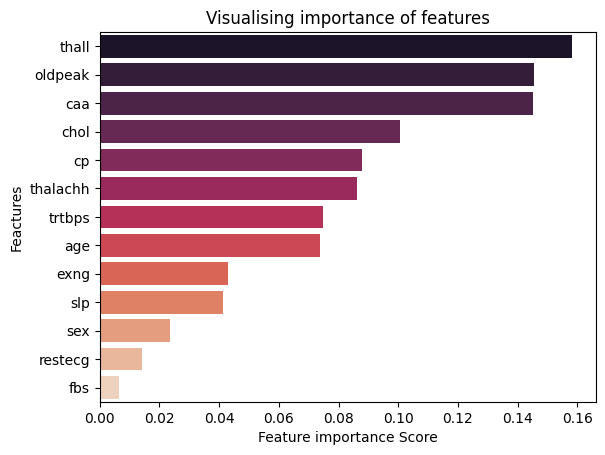

In [ ]:
#visualising the feature scores
sns.barplot(x=feature_score,y=feature_score.index,palette="rocket")
plt.xlabel("Feature importance Score")
plt.ylabel("Feactures")
plt.title("Visualising importance of features")
plt.show()

By observing that thall feature has high importance , fbs has less importance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# adaboost experiments
# create x and y train

X = df.drop('output', axis=1)
y = df[['output']]

# split data into train and test/validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 13)
(242, 1)
(61, 13)
(61, 1)


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
y=df['output']
x=df.drop(columns=['output'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(x_test)
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        43
           1       0.81      0.90      0.85        48

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



#Model Evaluation

In [ ]:
#Combining all the model scores

In [ ]:
import pandas as pd

results = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree','K-Nearest Neighbors','RandomForestClassifier'],
                        'Score': ['0.83', '0.82','0.80','0.85']})

results_df = results.sort_values(by="Score", ascending=False)
results_df = results_df.set_index('Score')
results_df.head()

,model
Score,
0.85,RandomForestClassifier
0.83,Logistic Regression
0.82,Decision Tree
0.80,K-Nearest Neighbors


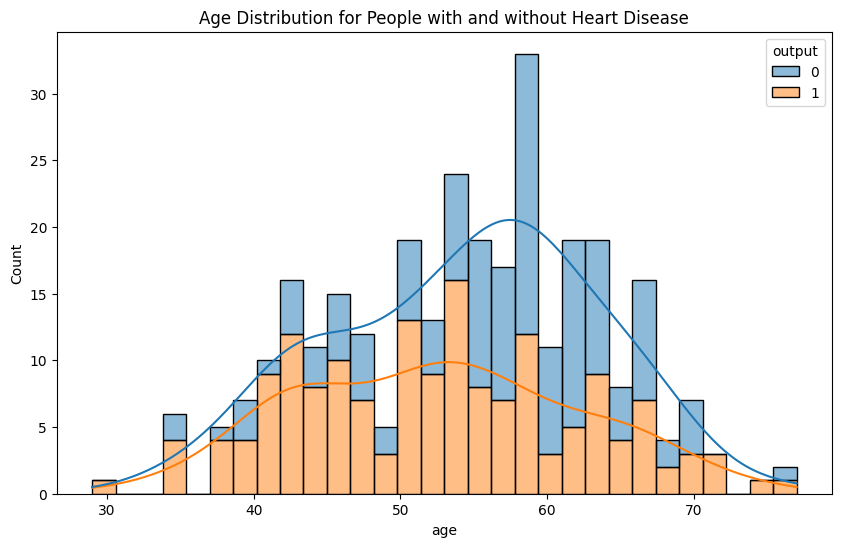

In [ ]:
# Age distribution for people with and without heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='age',hue='output',bins=30,multiple='stack', kde=True)
plt.title('Age Distribution for People with and without Heart Disease')
plt.show()

 The age distribution analysis is in between the range 50-60, their is a high chance to get the heart disease

#Risk Assessment

In [ ]:
#Identify individuals at higher risk based on specific criteria
higher_risk_individuals = df[(df['age'] > 50) & (df['chol'] > 200)].sum()
print("Individuals at higher risk:")
print(higher_risk_individuals).

Individuals at higher risk:
age          9112.0
sex           103.0
cp            128.0
trtbps      20810.0
chol        40169.0
fbs            27.0
restecg        71.0
thalachh    21878.0
exng           63.0
oldpeak       189.3
slp           174.0
caa           138.0
thall         324.0
output         58.0
dtype: float64


Additional analysis may be required based on the dataset and specific risk factors

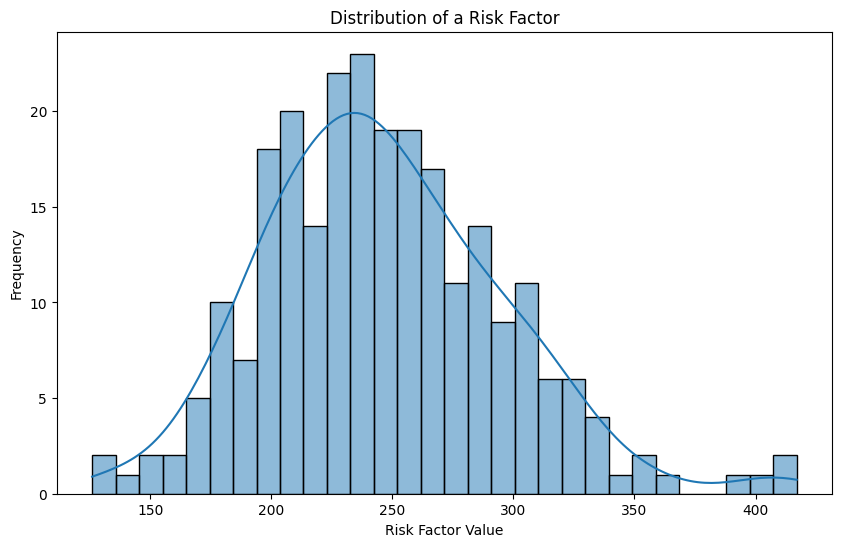

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', bins=30, kde=True)
plt.title('Distribution of a Risk Factor')
plt.xlabel('Risk Factor Value')
plt.ylabel('Frequency')
plt.show()

The histogram reveals the distribution of cholesterol levels in the dataset, indicating a concentration of values around a central range. The majority of individuals exhibit cholesterol levels within this range 200-250 are high.

In [ ]:
heartdisease_count=df['output'].value_counts()

In [ ]:
heartdisease_percentage=(heartdisease_count/heartdisease_count.sum())*100

In [ ]:
heartdisease_percentage

1    54.455446
0    45.544554
Name: output, dtype: float64

The prevalence of individuals with heart disease is approximately 54%, while the prevalence of individuals without heart disease is approximately 45%.


* Most of the people are having heart disease.  
* overall dataset chol is the risk factor compared to others.

*There is a high chances to get heart disease at the age 50-60.   
*



